# Tarea revisión



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
#Utilizamos los dos archivos de EEG
excel_conectividad = r"/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S03_datasets/EEG.xlsx"
excel_coordenadas= r"/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S03_datasets/EEG_3D_coordinates.xlsx"

In [20]:
conectividad_dict= pd.read_excel(excel_conectividad, sheet_name=None)
coordenadas_dict= pd.read_excel(excel_coordenadas, sheet_name= None)

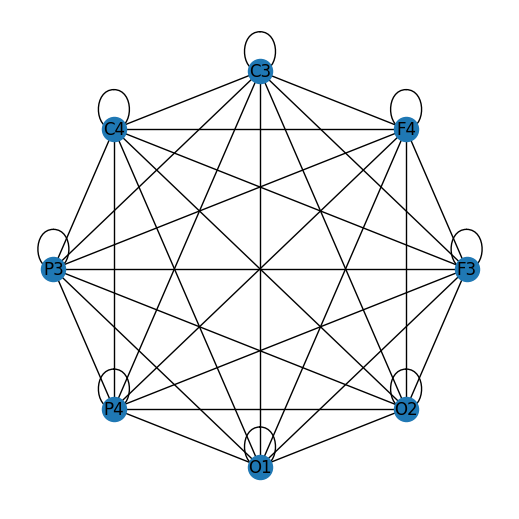

In [21]:
#Especifico cuál hoja de excel voy a leer, posición 0
motor_df= conectividad_dict[list(conectividad_dict.keys())[0]]
coordenadas_df= coordenadas_dict[list(coordenadas_dict.keys())[0]]

#Redefine el índice para que sea más fácil convertirlo a grafo
motor_df.set_index("Unnamed: 0", inplace=True, drop=True)
coordenadas_df.set_index("Canal", inplace= True, drop=True)

#Dibujamos el grafo
plt.figure(figsize=(5,5))
G = nx.from_pandas_adjacency(motor_df)
nx.draw_circular(G, with_labels=True)
plt.show()

In [3]:
pip install ipympl
#Crear un diccionario de posiciones 
pos2D= {canal: (coordenadas_df.loc[canal, "x"],
                coordenadas_df.loc[canal, "y"]) for canal in coordenadas_df.index}   #viene en el excel y esto nada más se utiliza en networkx para 2D

plt.figure(figsize=(4,4))
nx.draw_networkx(G, pos=pos2D)
plt.show()

SyntaxError: invalid syntax (2001857623.py, line 1)

In [ ]:
%matplotlib widget
#Creamos el grafo en 3D
pos3D= {canal: (coordenadas_df.loc[canal, "x"],
                coordenadas_df.loc[canal, "y"],
                coordenadas_df.loc[canal, "z"]) for canal in coordenadas_df.index} 

fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection="3d")  #subplot para imágenes en 3D
#plt.show()  #Solo muestra lo que está llevando hasta ahora, no se ejecuta esta parte ya hasta el final

#Dibujar los nodos en 3D
for canal, (x, y, z) in pos3D.items():  
    ax.scatter(x,y,z, s=100)
    ax.text(x,y,z+0.03, canal, fontsize=10, ha="center")

for i, j, data in G.edges(data=True):
    x=[pos3D[i][0], pos3D[j][0]]
    y=[pos3D[i][1], pos3D[j][1]]
    z=[pos3D[i][2], pos3D[j][2]]
    ax.plot(x,y,z, linewidth=data["weight"]*5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Red de conectividad EEG (3D)")

plt.show()

In [34]:
import seaborn as sns  # grafo bidireccional

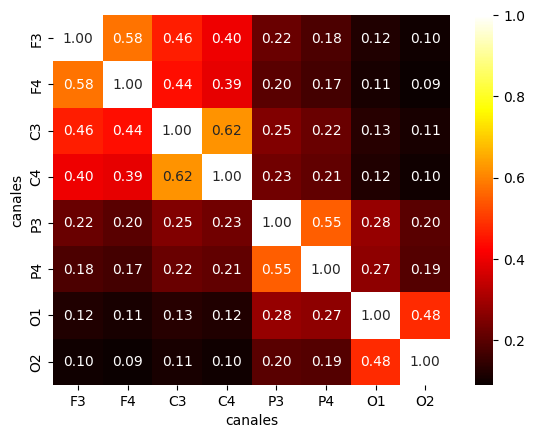

In [37]:
#Crear un mapa de calor
ax = sns.heatmap(motor_df, 
                 annot=True, cmap="hot", fmt=".2f", 
                 xticklabels=motor_df.columns, yticklabels=motor_df.index)
                 
                 
  
ax.set(xlabel="canales", ylabel="canales")
plt.show()

#operación para quitar los unos y que esté con ceros en la diagonal

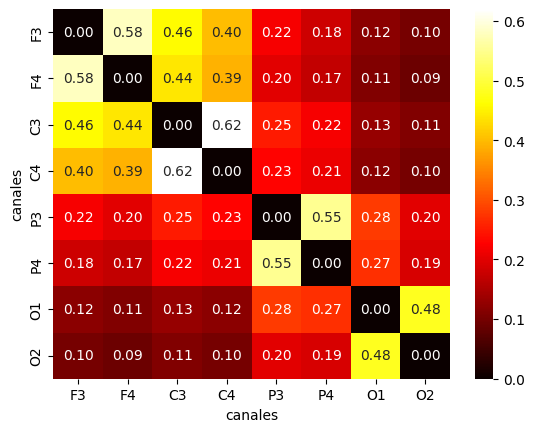

In [42]:
np.fill_diagonal(motor_df.values,0)
ax = sns.heatmap(motor_df.values,
                 annot=True, cmap="hot", fmt=".2f", 
                 xticklabels=motor_df.columns, yticklabels=motor_df.index)
                 
                 
  
ax.set(xlabel="canales", ylabel="canales")
plt.show()